In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
learning_rate = 0.001
num_epochs = 10000
step_display = 500
save_file = np.load('ch5_data.npz')

In [4]:
X = save_file['X']
T = save_file['T']

w0 = tf.Variable(tf.random_uniform([1], -20.0, 20.0), name='weight')
w1 = tf.Variable(tf.random_uniform([1], 120, 170), name='bias')

x = tf.placeholder(dtype=tf.float32, name='x_true')
y = tf.placeholder(dtype=tf.float32, name='y_true')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
t = tf.add(tf.multiply(w0, x), w1)
cost = tf.reduce_mean(tf.square(t - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use tf.cast instead.


Epoch: 500, cost: 49.242149353027344, weight: [1.6259917], bias: [134.69112]
Epoch: 1000, cost: 49.177757263183594, weight: [1.615627], bias: [134.87003]
Epoch: 1500, cost: 49.13142776489258, weight: [1.6068376], bias: [135.0217]
Epoch: 2000, cost: 49.09803771972656, weight: [1.5993657], bias: [135.15068]
Epoch: 2500, cost: 49.07402801513672, weight: [1.5930511], bias: [135.25964]
Epoch: 3000, cost: 49.05671691894531, weight: [1.5876809], bias: [135.35233]
Epoch: 3500, cost: 49.04419708251953, weight: [1.5830964], bias: [135.43144]
Epoch: 4000, cost: 49.03530502319336, weight: [1.5792662], bias: [135.49756]
Epoch: 4500, cost: 49.028873443603516, weight: [1.5759839], bias: [135.55421]
Epoch: 5000, cost: 49.02421951293945, weight: [1.5732008], bias: [135.60225]
Epoch: 5500, cost: 49.0208740234375, weight: [1.5708532], bias: [135.64276]
Epoch: 6000, cost: 49.0184326171875, weight: [1.5688511], bias: [135.6773]
Epoch: 6500, cost: 49.016632080078125, weight: [1.5670841], bias: [135.70782]
E

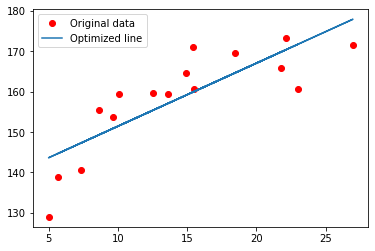

In [6]:
for epoch in range(num_epochs):
    _c, _weight, _bias, _ = sess.run([cost, w0, w1, train], feed_dict = {x:X, y:T})
    if (epoch+1) % step_display == 0:
        print ("Epoch: {0}, cost: {1}, weight: {2}, bias: {3}".format(epoch+1, _c, _weight, _bias))

print('최적화 작업을 완료했습니다.')

plt.plot(X, T, 'ro', label='Original data')
plt.plot(X, sess.run(w0) * X + sess.run(w1), label='Optimized line')
plt.legend()
plt.show()